#<center>CNN : Convolutional Newrual Network


#1. เตรียมข้อมูล (Dataset prepare)

###อ่านไฟล์ในโฟลเดอร์ covid และ normal

In [26]:
!gdown --id 1wbwAhyEBaqHe63767c2uKdorQfr7v_lz
!unzip -qq Sign_new.zip

/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wbwAhyEBaqHe63767c2uKdorQfr7v_lz
To: /Users/srisuphadith/cnn/Sign_new.zip
100%|██████████████████████████████████████| 45.2M/45.2M [00:02<00:00, 21.3MB/s]


In [28]:
from os import listdir
from os.path import isfile, join
from tqdm import tqdm

In [29]:
width = 128
num_classes = 16
trainpath = 'trainn/'
testpath = 'testt/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]

In [30]:
trainImg , testImg

(['trainn/Nongtong',
  'trainn/Bosang',
  'trainn/Viang',
  'trainn/Sankampang',
  'trainn/Tung',
  'trainn/Makam',
  'trainn/Maerim',
  'trainn/Kuan',
  'trainn/Doisaket',
  'trainn/Maetang',
  'trainn/Saimai',
  'trainn/Bankad',
  'trainn/Sanhot',
  'trainn/Sansai',
  'trainn/Sanpa',
  'trainn/Jomtong'],
 ['testt/Nongtong',
  'testt/Bosang',
  'testt/Viang',
  'testt/Sankampang',
  'testt/Tung',
  'testt/Makam',
  'testt/Maerim',
  'testt/Kuan',
  'testt/Doisaket',
  'testt/Maetang',
  'testt/Saimai',
  'testt/Bankad',
  'testt/Sanhot',
  'testt/Sansai',
  'testt/Sanpa',
  'testt/Jomtong'])

In [31]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            
            l = imagePath.split('/')[1]
            
            
            if l == 'Bosang':
              labels.append([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])         
            elif l == 'Maerim':
              labels.append([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            elif l == 'Saimai':
              labels.append([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
            elif l == 'Sansai':
              labels.append([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
            elif l == 'Bankad':
              labels.append([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])
            elif l == 'Doisaket':
              labels.append([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
            elif l == 'Jomtong':
              labels.append([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
            elif l == 'Kuan':
              labels.append([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0])
            elif l == 'Maetang':
              labels.append([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
            elif l == 'Makam':
              labels.append([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
            elif l == 'Nongtong':
              labels.append([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
            elif l == 'Sanhot':
              labels.append([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])
            elif l == 'Tung':
              labels.append([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
            elif l == 'Viang':
              labels.append([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
            elif l == 'Sankampang':
              labels.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
            elif l == 'Sanpa':
              labels.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
          

  return rawImgs, labels

In [32]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 6/6 [00:00<00:00, 406.94it/s]


In [33]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [34]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((671, 128, 128, 3), (671, 16), (96, 128, 128, 3), (96, 16))

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from os.path import isfile, join

dir1 = os.listdir('train/doisaked/')
dir2 = os.listdir('train/maerim/')



In [2]:
raw = []
label = []

In [3]:
trainpath = 'train/maerim/'
x = []
trainImg = [trainpath+f for f in os.listdir(trainpath)]
#print(trainImg)
for i in (trainImg):
    if i[-1] != 'e':
     x.append(i)
     img = cv2.imread(str(i))
     img = cv2.resize(img ,(224,224))
     raw.append(img)
     label.append(0)
    

In [4]:
trainpath = 'train/doisaked/'
x = []
trainImg = [trainpath+f for f in os.listdir(trainpath)]
#print(trainImg)
for i in (trainImg):
    if i[-1] != 'e':
     x.append(i)
     img = cv2.imread(str(i))
     img = cv2.resize(img ,(224,224))
     raw.append(img)
     label.append(1)
    

In [5]:
(np.array(label)).shape

(51,)

In [6]:
(np.array(raw)).shape

(51, 224, 224, 3)

In [7]:
X = np.array(raw)
y = np.array(label)

In [8]:
X = X.astype('float32')
X /= 255 

In [9]:
X.shape , y.shape

((51, 224, 224, 3), (51,))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

#2. สร้างโมเดล (Model create)

In [35]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [36]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
image_size = 128
batch_size = 64
epochs = 200
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(16, activation='softmax')
    ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy'
                , metrics= ['accuracy'])

#3. สอนโมเดล (Model training)

In [41]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/200


2022-11-06 19:31:26.392114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.0700

2022-11-06 19:31:33.972832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 8s 546ms/step - loss: 0.6934 - accuracy: 0.0700 - val_loss: 0.6858 - val_accuracy: 0.0625
Epoch 2/200
11/11 [==============================] - 5s 461ms/step - loss: 0.6670 - accuracy: 0.0641 - val_loss: 0.6733 - val_accuracy: 0.0625
Epoch 3/200
11/11 [==============================] - 5s 420ms/step - loss: 0.6397 - accuracy: 0.0700 - val_loss: 0.6571 - val_accuracy: 0.0625
Epoch 4/200
11/11 [==============================] - 5s 422ms/step - loss: 0.6059 - accuracy: 0.0581 - val_loss: 0.6345 - val_accuracy: 0.0417
Epoch 5/200
11/11 [==============================] - 5s 415ms/step - loss: 0.5616 - accuracy: 0.0760 - val_loss: 0.6030 - val_accuracy: 0.0417
Epoch 6/200
11/11 [==============================] - 4s 407ms/step - loss: 0.5075 - accuracy: 0.0745 - val_loss: 0.5613 - val_accuracy: 0.0417
Epoch 7/200
11/11 [==============================] - 5s 415ms/step - loss: 0.4477 - accuracy: 0.0700 - val_loss: 0.5109 - val_accuracy: 0.0417
Epoch 8/200



#4ทดสอบโมเดล (Model Evaluation)

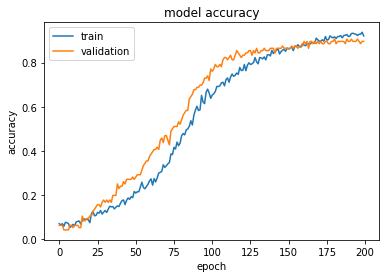

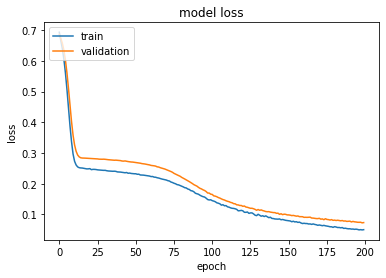

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def cnn_pred(img_sign):
    #img = cv2.imread('/Users/srisuphadith/cnn/testt/Tung/Tung4_jpg.rf.6ec3a4a1aa16eb74e0582a76f8ea59c8.jpg')
    img = cv2.resize(img_sign,(128,128))
    rimg = np.array(img)
    rimg = rimg.astype('float32')
    rimg /= 255
    rimg = np.reshape(rimg ,(1,128,128,3))
    predict = model.predict(rimg)      
    print(predict)
    cn = predict[0][0]
    c = 0
    for i,x in enumerate(predict[0]):
        if x > cn:
            cn = x
            c = i
    print(cn,c)
    l = ""
    if c == 0:
      l = 'Bosang'       
    elif c == 1:
      l = 'Maerim'
    elif c == 2:
      l = 'Saimai'
    elif c == 3:
      l = 'Sansai'
    elif c == 4:
      l = 'Bankad'
    elif c == 5:
      l = 'Doisaket'
    elif c == 6:
      l = 'Jomtong'
    elif c == 7:
      l = 'Kuan'
    elif c == 8:
      l = 'Maetang'
    elif c == 9:
      l = 'Makam'
    elif c == 10:
      l = 'Nongtong'
    elif c == 11:
      l = 'Sanhot'
    elif c == 12:
      l = 'Tung'
    elif c == 13:
      l = 'Viang'
    elif c == 14:
      l = 'Sankampang'
    elif c == 15:
      l = 'Sanpa'
    print(l)


In [70]:
img = cv2.imread('/Users/srisuphadith/cnn/testt/Tung/Tung4_jpg.rf.6ec3a4a1aa16eb74e0582a76f8ea59c8.jpg')
img = cv2.resize(img ,(128,128))
rimg = np.array(img)
rimg = rimg.astype('float32')
rimg /= 255
rimg = np.reshape(rimg ,(1,128,128,3))
predict = model.predict(rimg)      
print(predict)
cn = predict[0][0]
c = 0
for i,x in enumerate(predict[0]):
    if x > cn:
        cn = x
        c = i
print(cn,c)
l = ""
if c == 0:
  l = 'Bosang'       
elif c == 1:
  l = 'Maerim'
elif c == 2:
  l = 'Saimai'
elif c == 3:
  l = 'Sansai'
elif c == 4:
  l = 'Bankad'
elif c == 5:
  l = 'Doisaket'
elif c == 6:
  l = 'Jomtong'
elif c == 7:
  l = 'Kuan'
elif c == 8:
  l = 'Maetang'
elif c == 9:
  l = 'Makam'
elif c == 10:
  l = 'Nongtong'
elif c == 11:
  l = 'Sanhot'
elif c == 12:
  l = 'Tung'
elif c == 13:
  l = 'Viang'
elif c == 14:
  l = 'Sankampang'
elif c == 15:
  l = 'Sanpa'
print(l)

1/1 [==============================] - 0s 79ms/step
[[4.9929167e-06 1.6346792e-04 1.0236003e-03 1.1116582e-05 4.4701184e-05
  7.2910694e-07 4.4142125e-05 5.5319539e-05 6.5176158e-05 4.7952943e-03
  2.1950502e-06 2.6442771e-04 9.9335313e-01 1.0357473e-05 7.0456685e-05
  9.0906404e-05]]
0.9933531 12
Tung


In [20]:
testpath = 'test/'
testImg = [testpath+f for f in os.listdir(testpath) if os.listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        print(file)
        if file[-1]== "g":
           
          img = cv2.imread(file)
          img = cv2.resize(img ,(224,224))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,224,224,3))
          predict = model.predict(rimg)
          
          print(predict)
          #plt.imshow(ori)
          plt.show()

NotADirectoryError: [Errno 20] Not a directory: 'test/.DS_Store'

In [46]:
import sklearn.metrics as metrics
predicted_classes = (model.predict(x_test))
report = metrics.classification_report(y_test, predicted_classes)
print(report)    

3/3 [==============================] - 0s 73ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [47]:
y_test , predicted_classes

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[1.58108785e-04, 3.21693660e-05, 9.02006635e-04, ...,
         9.02195779e-07, 1.94521044e-09, 1.22960140e-08],
        [1.27582192e-01, 5.05283999e-04, 5.47763892e-02, ...,
         3.21946340e-04, 1.94953187e-09, 1.07036700e-04],
        [6.24592742e-03, 1.21920537e-02, 1.72008201e-02, ...,
         4.71058674e-02, 9.29048692e-04, 8.39312002e-03],
        ...,
        [4.66185622e-03, 5.98029942e-07, 8.28837082e-02, ...,
         4.26802643e-07, 1.92887321e-11, 1.42218605e-05],
        [9.17324331e-03, 2.16794675e-07, 3.98313142e-02, ...,
         2.15192131e-06, 1.22939076e-10, 4.70006707e-05],
        [1.48472504e-03, 2.36444521e-06, 1.00109413e-01, ...,
         3.64226662e-06, 3.81237986e-10, 2.39117526e-06]], dtype=float32))

In [48]:

from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
conf = metrics.confusion_matrix(y_test, predicted_classes)
sns.heatmap(conf, annot=True )
#

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [71]:
model.save('my_model_v.2.h5')

In [50]:
new_model = tf.keras.models.load_model('my_model.h5')

In [51]:
import sklearn.metrics as metrics
predicted_classes = (new_model.predict(x_test))
report = metrics.classification_report(y_test, predicted_classes)
print(report)   

ValueError: in user code:

    File "/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/miniconda3/envs/AI2022/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 128, 128, 3)
